# Can Age and Experience predict the number of hours played in the Players dataset?

Vanessa Mah 76858182 - Group 22

## (1) Data Description

Begin by installing and loading the required packages for data manipulation.

In [1]:
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Only the `players.csv` dataset will be used for this project, as it contains the data necessary to address the main question. The file can be loaded into R using the `read.csv()` function.

In [2]:
url <- "https://raw.githubusercontent.com/vmah1/dsci100_individual_project/refs/heads/main/players.csv"
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


### Datset Overview

The `players` dataset provides insights into a group of players, including their experience level, subscription status, hours played, names, gender, and age. 

Number of Observations: 196 

Number of Variables: 7 


#### Variable Information

| Variable     | Type      | Example Values                   | Meaning                                      |
|--------------|-----------|----------------------------------|----------------------------------------------|
| `experience`   | Character | Amateur, Pro | Player’s skill or experience level           |
| `subscribe`    | Logical   | TRUE / FALSE                    | Whether player has an active subscription    |
| `hashedEmail`  | Character | f8fda41...                     | Unique anonymized player identifier          |
| `played_hours` | Numeric   | 0.0, 30.3, 48.4                 | Total hours played                           |
| `name`         | Character | Morgan, Christian                   | Player’s given name                          |
| `gender`       | Character | Male, Female, Non-binary | Player’s self-reported gender                |
| `Age`          | Numeric   | 9, 21, 58                      | Age of the player in years                                 |


#### Potential Issues in the Data
There are several potential issues that need to be addressed for more accurate analysis:

- **Missing values**: The `Age` variable contains missing values for one player. There is also a possibility that other variables may contain missing values that are not visible.
- **Outliers**: The `played_hours` variable has extreme values (eg. 48.4 hours for one player), while many others report very low playtime. These outliers could skew summary statistics, especially the mean.
- **Imbalanced categories**: The `gender` variable contains diverse categories, but some (eg. Two-Spirited) may be underrepresented.
- **Experience variable**: The `experience` variable should be converted to a factor, as it represents categorical data (eg. "Amateur", "Pro") and is currently stored as a character.

#### How the Data Were Collected
The dataset was collected from the PLAIcraft server through both self-reported information and automated tracking.

**Player-Provided Information:**
- `experience`, `name`, `gender`, and `Age`: Provided by players during account creation or profile updates.
- `hashedEmail`: Player email address collected during account registration, then anonymized for privacy.
- `subscribe`: Collected based on the player's selection of an active subscription during account creation or afterward.

**Automated Tracking:**
- `played_hours`: Automatically tracked by the server based on in-game activity.

Here are the summary statistics for the quantitative variables in the `players` dataset, rounded to two decimal places:

In [3]:
summary_stats <- players |>
  summarise(
    Age_mean = round(mean(Age, na.rm = TRUE), 2),
    Age_min = min(Age, na.rm = TRUE),
    Age_max = max(Age, na.rm = TRUE),
    Hours_played_mean = round(mean(played_hours, na.rm = TRUE), 2),
    Hours_played_min= min(played_hours, na.rm = TRUE),
    Hours_played_max= max(played_hours, na.rm = TRUE)
  )

summary_stats

Age_mean,Age_min,Age_max,Hours_played_mean,Hours_played_min,Hours_played_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,9,58,5.85,0,223.1


## (2) Question

The broad question to be answered is: **Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts?**

To refine this question, the specific question is: **Can Age and Experience predict hours played in the Players dataset?**

The data will show how age and experience affect hours played on PLAIcraft, helping identify engaged players for targeted recruitment.

To perform minimum wrangling on the dataset for predictive modeling:
1. **Select relevant columns**: Only include the variables `Age`, `experience`, and `played_hours`, which are necessary for the analysis.<br><br>

2. **Convert data types**: Ensure the data is in an appropriate format for modeling:
   - Convert `Age` to an integer to ensure it's represented as a whole number.
   - Convert `experience` to a factor to treat it as a categorical variable.<br><br>

3. **Save the wrangled data**: Save the tidy dataset to a new object called `players_tidy` to use in modeling.

**Note**: 
- Only the `Age`, `experience`, and `played_hours` variables from the `players` dataset will be used to predict player engagement.

- The dataset is tidy because each column represents a single variable, and each row corresponds to a single player. The missing value in the `Age` variable is ignored in the minimum wrangling process, as it only affects summary statistics (like the mean) and does not significantly impact the modeling.

## (3) Exploratory Data Analysis and Visualization

To further analyze the dataset, the saved object, `players`, will be referenced to reload the dataset.

In [4]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Minimal wrangling will be applied to the dataset to transform it into a tidy format.

In [5]:
players_tidy <- players |>
  select (Age, experience, played_hours) |>
  mutate(
    Age = as.integer(Age),
    experience = as_factor(experience))

head(players_tidy)

Age,experience,played_hours
<int>,<fct>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
21,Amateur,0.7
21,Regular,0.1
17,Amateur,0.0


The mean of each quantitative variable can be computed, excluding missing values with the `na.rm = TRUE` argument.

In [6]:
mean_values <- players_tidy |>
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE))
mean_values

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


A few exploratory visualizations of the data can now be created.

A scatter plot can be created to explore the relationship between age and hours played, with `Age` on the x-axis and `played_hours` on the y-axis, to identify any patterns/trends. Data points are colour-coded by players' experience level.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


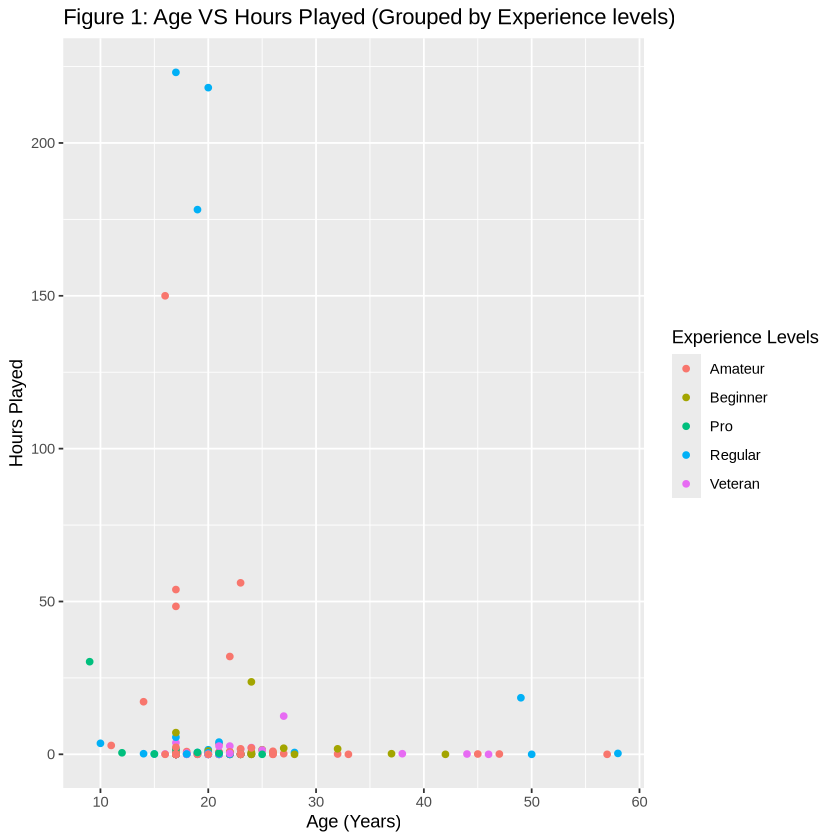

In [7]:
players_age <- players |>
  ggplot(aes(x=Age, y=played_hours, color=experience)) +
  geom_point() +
  labs(title = "Figure 1: Age VS Hours Played (Grouped by Experience levels)",
        color = "Experience Levels",
        x = "Age (Years)",
        y = "Hours Played" )
players_age

Figure 1 shows most playtime around 50 hours comes from Amateurs, and over 175 hours from Regulars. Below 10 hours, players are from a mix of levels. Most players are aged 10-30, with outliers over 150 hours in the 16-20 range. Playtime and player count drop after age 30.

Bar graphs show player distribution by experience level, with `experience` on the x-axis and `played_hours` on the y-axis.

experience,avg_played_hrs,total_hours
<fct>,<dbl>,<dbl>
Pro,2.6000000,36.4
Veteran,0.6479167,31.1
Amateur,6.0174603,379.1
Regular,18.2083333,655.5
Beginner,1.2485714,43.7


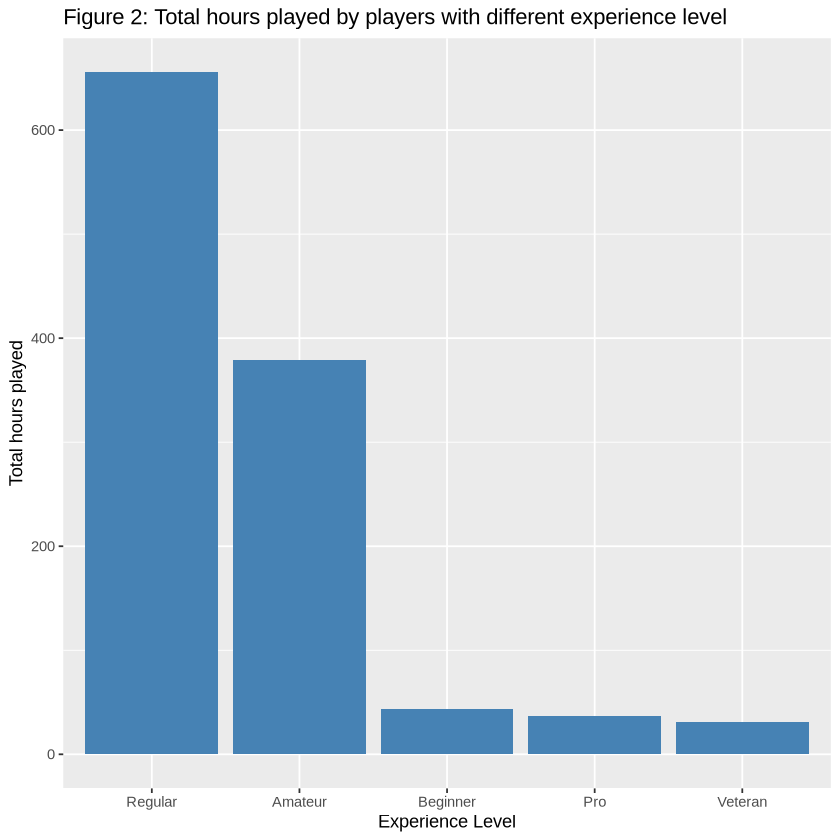

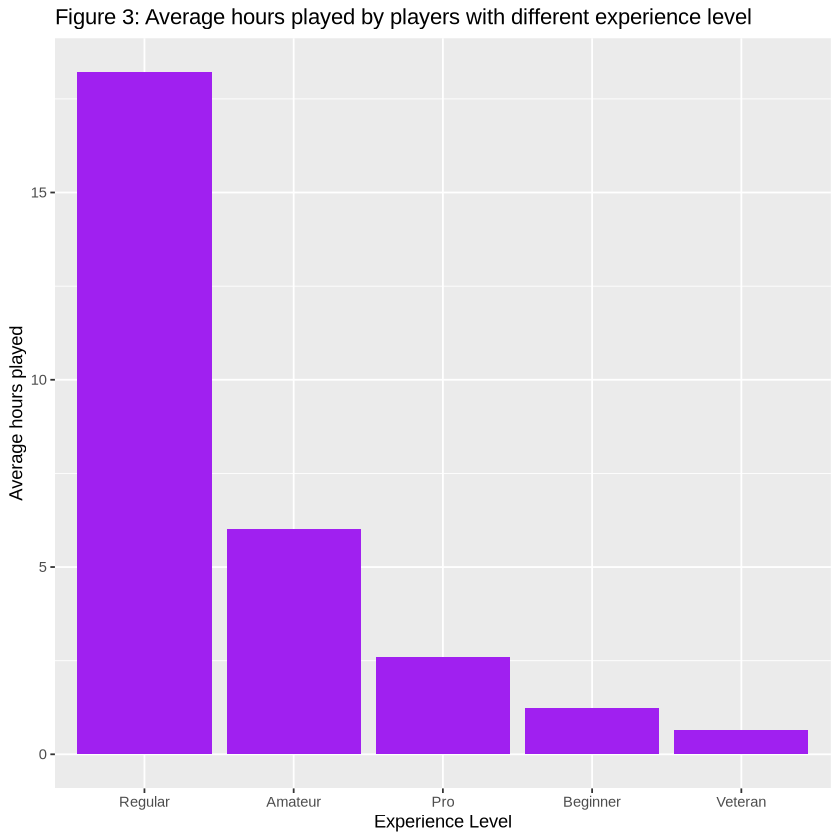

In [8]:
experience_played_hours_summarize <- players_tidy |>
            select(experience, played_hours) |>
            group_by(experience) |>
            summarize(avg_played_hrs = mean (played_hours, na.rm = TRUE),
                      total_hours = sum(played_hours, na.rm = TRUE))|>
            mutate(experience = fct_reorder(experience, total_hours, .desc = TRUE))
experience_played_hours_summarize

played_hours_experience <- experience_played_hours_summarize |>
          ggplot(aes(x = experience, y = total_hours)) +
          geom_bar(stat="identity", fill = "steelblue") +
          labs(title = "Figure 2: Total hours played by players with different experience level",
               x = "Experience Level",
               y = "Total hours played" )

played_hours_experience

players_average_experience <- experience_played_hours_summarize |>
  mutate(experience = fct_reorder(experience, avg_played_hrs, .desc = TRUE))

avg_played_hours_experience <- players_average_experience |>
          ggplot(aes(x = experience, y = avg_played_hrs)) +
          geom_bar(stat="identity", fill = "purple") +
          labs(title = "Figure 3: Average hours played by players with different experience level",
               x = "Experience Level",
               y = "Average hours played" )

avg_played_hours_experience

Figure 2 shows Regular players have the highest total hours played, followed by Amateurs, while all other levels have low playtime, suggesting high playtime isn’t linked to experience level.

Figure 3 shows Regular players have the highest average hours, indicating they are the most consistently engaged group out of all other experience levels.

## (4) Methods and Plan

KNN will assess whether age and experience predict hours played, using **KNN regression** for age (continuous) and **KNN classification** for experience (categorical). KNN is preferred over linear regression for its flexibility, as it adapts to data structure and is less sensitive to outliers. KNN assumes scaled input variables and is sensitive to the choice of *K* and unscaled data.

To select the best model, *K* will be tuned by cross-validation. For age versus hours played, KNN regression will be compared to linear regression using RMSPE, with a lower value favouring KNN. For experience versus hours played, KNN classification will be used, as the target is categorical.

The `players_tidy` dataset will be split 75/25 into training and testing sets, stratified by `played_hours`. A recipe will standardize the data, and KNN regression will be tuned over a grid of K values (1–110) using 5-fold cross-validation. The optimal *K* will be selected based on RMSPE and compared to linear regression. For classification, `experience` is instead the target and `played_hours` is the predictor, with 5-fold cross-validation stratified by `experience` and K values (1–25).